# Polynomial Regression
E se seus dados não parecerem lineares? Vejamos alguns dados de compra/velocidade da página mais realistas:

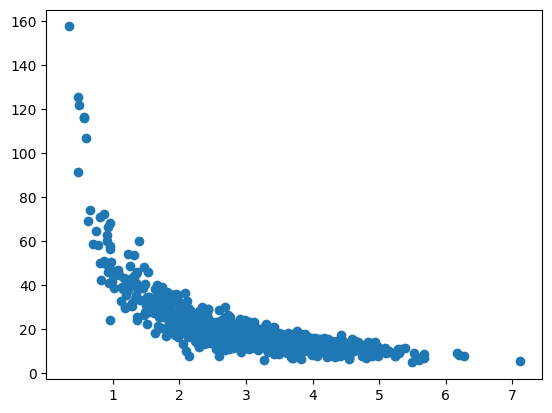

In [43]:
%matplotlib inline
# Comando específico do Jupyter Notebook para exibir gráficos matplotlib na célula atual

from pylab import *
# Importa todas as funções e submódulos do pylab, que combina funcionalidades de matplotlib e numpy

import numpy as np
# Importa o módulo numpy com o alias np para funções matemáticas e geração de números aleatórios

np.random.seed(2)
# Define a semente do gerador de números aleatórios do numpy para garantir que os resultados sejam reproduzíveis

# Gera 1000 valores aleatórios com distribuição normal (média 3.0, desvio padrão 1.0) para simular a velocidade da página
pageSpeeds = np.random.normal(3.0, 1.0, 1000)

# Gera 1000 valores aleatórios com distribuição normal (média 50.0, desvio padrão 10.0) para simular o valor de compra
# Divide esses valores pelo array 'pageSpeeds' para criar uma relação inversa entre velocidade da página e valor de compra
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

# Cria um gráfico de dispersão (scatter plot) dos dados gerados
scatter(pageSpeeds, purchaseAmount)

# Exibe o gráfico de dispersão mostrando a relação entre velocidade da página e valor de compra
plt.show()


numpy tem uma função polyfit útil que podemos usar, para nos permitir construir um modelo polinomial de enésimo grau de nossos dados que minimize o erro quadrático. Vamos tentar com um polinômio de 4º grau:

In [44]:
# Converte a lista pageSpeeds em um array numpy x
x = np.array(pageSpeeds)

# Converte a lista purchaseAmount em um array numpy y
y = np.array(purchaseAmount)

# Ajusta um polinômio de grau 4 aos dados x (velocidades da página) e y (quantidades de compra) utilizando np.polyfit
# Retorna os coeficientes do polinômio, que são então utilizados para criar um objeto poly1d usando np.poly1d
p4 = np.poly1d(np.polyfit(x, y, 4))

# Imprime o polinômio ajustado p4
print(p4)


        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


Visualizaremos nosso gráfico de dispersão original, juntamente com um gráfico de nossos valores previstos usando o polinômio para tempos de velocidade de página variando de 0 a 7 segundos:

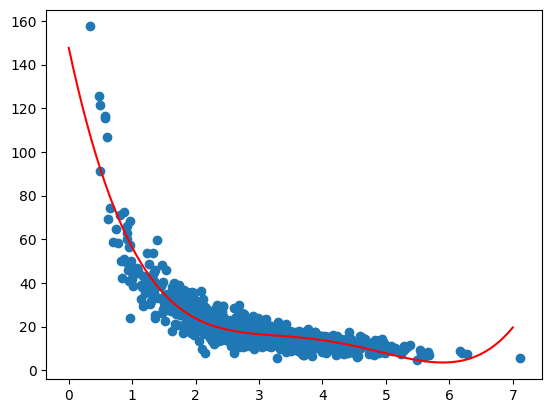

In [45]:


# Importa a biblioteca matplotlib.pyplot com o alias plt para plotagem
import matplotlib.pyplot as plt

# Cria um array de valores igualmente espaçados entre 0 e 7 para representar valores de x para a linha de regressão
xp = np.linspace(0, 7, 100)

# Cria um gráfico de dispersão dos dados originais x (velocidades da página) e y (quantidades de compra)
plt.scatter(x, y)

# Plota a linha de regressão p4(xp) no gráfico. O método p4(xp) calcula os valores de y correspondentes aos valores de xp.
# A linha é plotada com a cor vermelha ('r')
plt.plot(xp, p4(xp), c='r')

# Exibe o gráfico com o gráfico de dispersão e a linha de regressão sobreposta
plt.show()


Parece muito bom! Vamos medir o erro r-quadrado:

In [46]:
# Importa a função r2_score da biblioteca sklearn.metrics para calcular o R²
from sklearn.metrics import r2_score

# Calcula o coeficiente de determinação R² comparando os valores observados y com os valores preditos por p4(x)
r2 = r2_score(y, p4(x))

# Imprime o valor de R²
print(r2)


0.8293766396303073


## Activity
Experimente diferentes ordens polinomiais. Você consegue um ajuste melhor com pedidos mais altos? Você começa a ver overfitting, mesmo que a pontuação de r ao quadrado pareça boa para esse conjunto de dados específico?

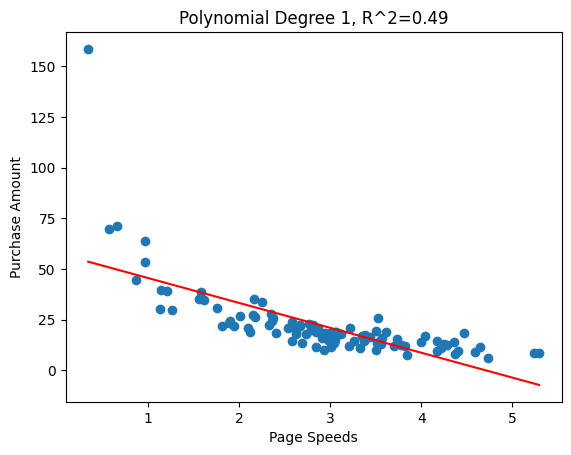

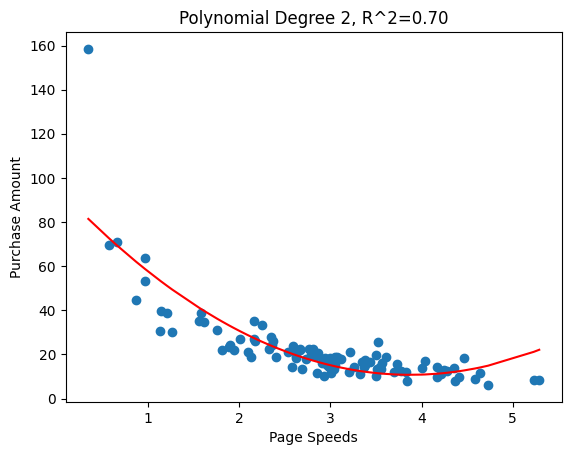

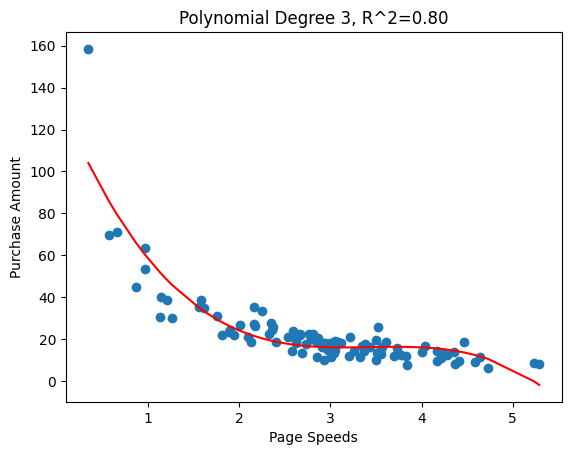

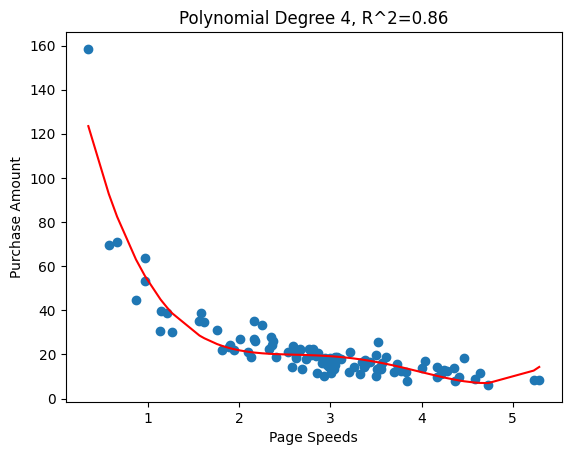

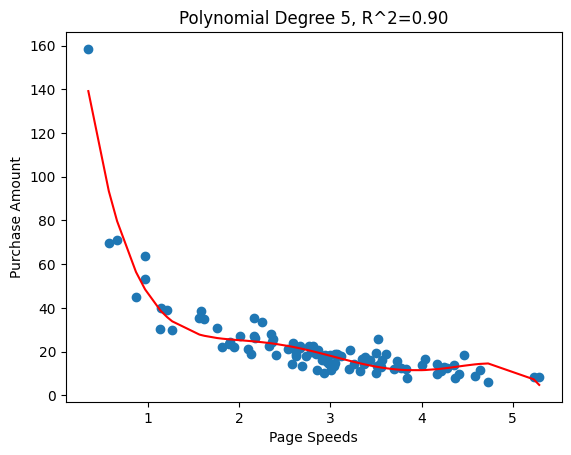

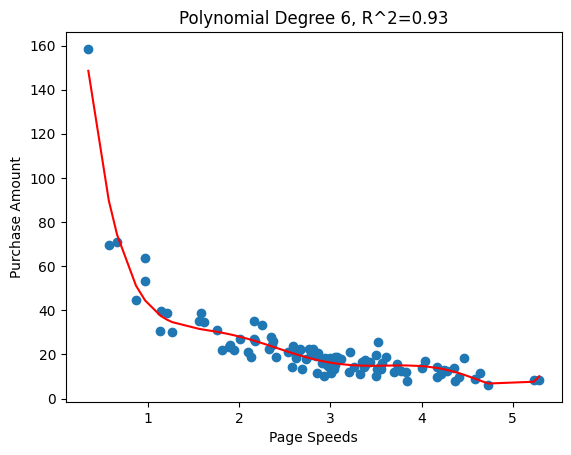

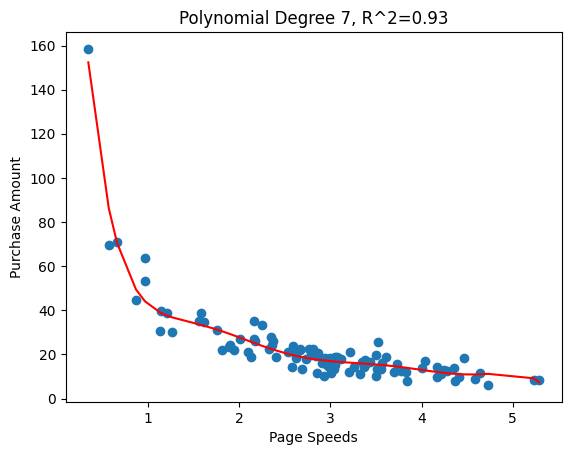

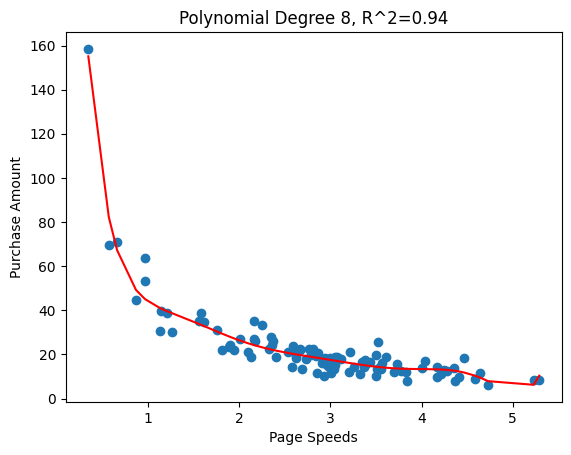

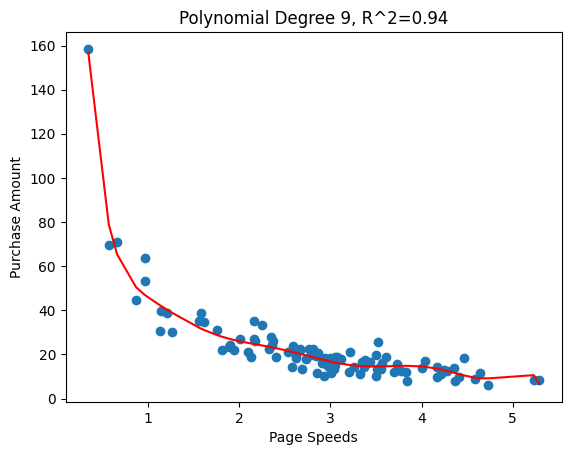

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Dados de exemplo
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 10.0, 100) / pageSpeeds

# Ajuste de polinômios de diferentes ordens
for degree in range(1, 10):
    # Ajusta o polinômio de grau 'degree' aos dados
    p = np.poly1d(np.polyfit(pageSpeeds, purchaseAmount, degree))
    
    # Valores previstos pelo polinômio ajustado
    predicted = p(pageSpeeds)
    
    # Calcula o coeficiente de determinação R²
    r2 = r2_score(purchaseAmount, predicted)
    
    # Plota os dados e o ajuste do polinômio
    plt.figure()
    plt.scatter(pageSpeeds, purchaseAmount)
    plt.plot(np.sort(pageSpeeds), p(np.sort(pageSpeeds)), c='r')
    plt.title(f'Polynomial Degree {degree}, R^2={r2:.2f}')
    plt.xlabel('Page Speeds')
    plt.ylabel('Purchase Amount')
    plt.show()


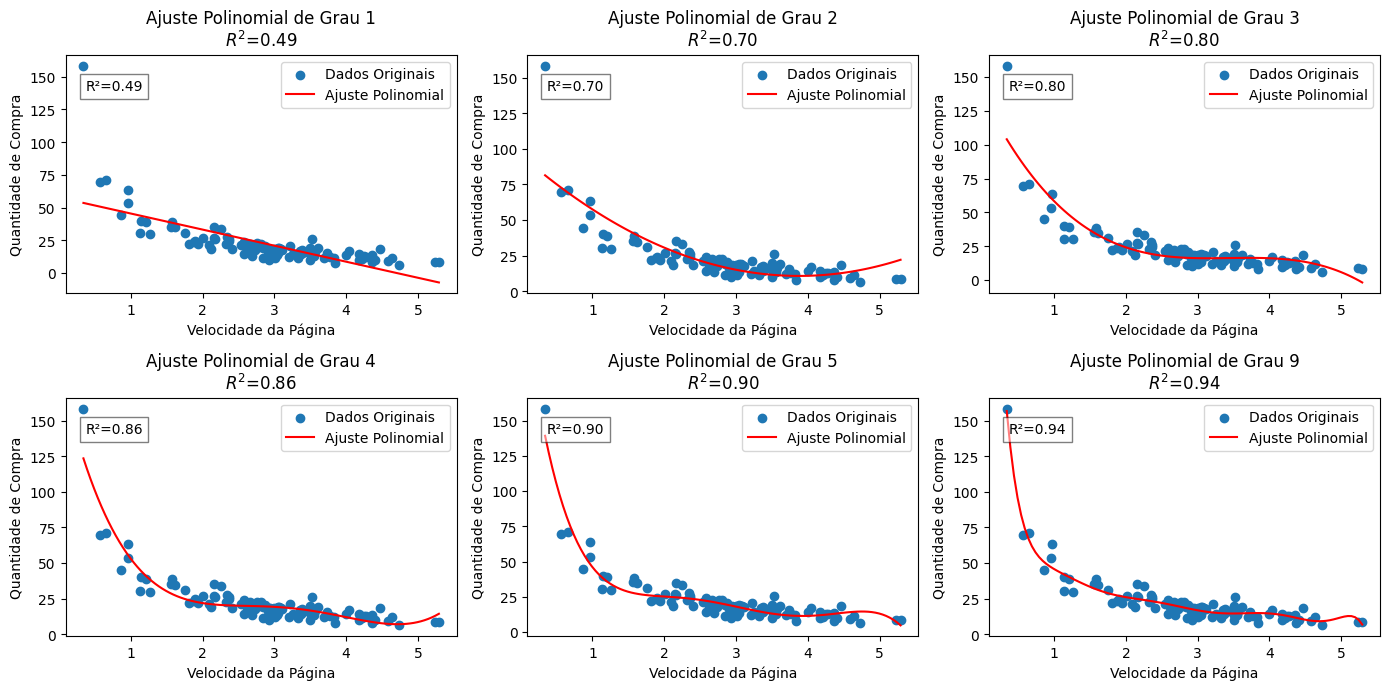

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Dados de exemplo
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 10.0, 100) / pageSpeeds

# Ajuste de polinômios de diferentes ordens
degrees = [1, 2, 3,4, 5, 9]  # Ajuste de graus adicionais para visualizar

# Configurações do gráfico
plt.figure(figsize=(14, 10))

# Loop sobre os diferentes graus de polinômios
for i, degree in enumerate(degrees):
    # Ajusta o polinômio de grau 'degree' aos dados
    p = np.poly1d(np.polyfit(pageSpeeds, purchaseAmount, degree))
    
    # Valores previstos pelo polinômio ajustado
    xp = np.linspace(min(pageSpeeds), max(pageSpeeds), 100)
    predicted = p(xp)
    
    # Calcula o coeficiente de determinação R²
    r2 = r2_score(purchaseAmount, p(pageSpeeds))
    
    # Plota os dados e o ajuste do polinômio
    plt.subplot(3, 3, i + 1)
    plt.scatter(pageSpeeds, purchaseAmount, label='Dados Originais')
    plt.plot(xp, predicted, c='r', label='Ajuste Polinomial')
    plt.title(f'Ajuste Polinomial de Grau {degree}\n$R^2$={r2:.2f}')
    plt.xlabel('Velocidade da Página')
    plt.ylabel('Quantidade de Compra')
    plt.legend()
    
    # Adiciona texto explicativo dentro do gráfico
    plt.text(0.05, 0.85, f'R²={r2:.2f}', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    
plt.tight_layout()
plt.show()
